MOO8KA777



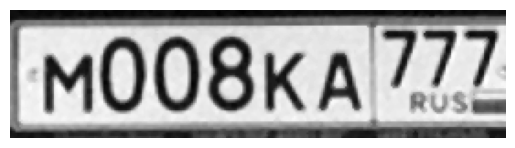

In [40]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 # This is the OpenCV Python library
import pytesseract # This is the TesseractOCR Python library
# Set Tesseract CMD path to the location of tesseract.exe file
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Read car image and convert color to RGB
carplate_img = cv2.imread(r'C:\Users\estep\OneDrive\Desktop\Module 8 - Portfolio Project\Russian License Plates\Russian_Plate_1.png')
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)
plt.imshow(carplate_img_rgb)

# Import Haar Cascade XML file for Russian car plate numbers
carplate_haar_cascade = cv2.CascadeClassifier(r'C:\Users\estep\AppData\Local\Programs\Python\Python310\Lib\site-packages\cv2\data\haarcascade_russian_plate_number.xml')

# Setup function to detect car plate
def carplate_detect(image):
    carplate_overlay = image.copy()
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay,scaleFactor=1.1, minNeighbors=3)
    for x,y,w,h in carplate_rects: 
        cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5) 
        return carplate_overlay
        detected_carplate_img = carplate_detect(carplate_img_rgb)
        plt.imshow(detected_carplate_img)

# Create function to retrieve only the car plate region itself
def carplate_extract(image):
    carplate_rects = carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1, minNeighbors=5)
    for x,y,w,h in carplate_rects: 
        carplate_img = image[y+15:y+h-10 ,x+15:x+w-20] # Adjusted to extract specific region of interest i.e. car license plate
        return carplate_img

# Enlarge image for further processing later on
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

# Display extracted car license plate image
carplate_extract_img = carplate_extract(carplate_img_rgb)
carplate_extract_img = enlarge_img(carplate_extract_img, 150)
plt.imshow(carplate_extract_img);

# Convert image to grayscale
carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
plt.axis('off') 
plt.imshow(carplate_extract_img_gray, cmap = 'gray');

# Apply median blur
carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,3) # kernel size 3
plt.axis('off') 
plt.imshow(carplate_extract_img_gray_blur, cmap = 'gray');

# Display the text extracted from the car plate
print(pytesseract.image_to_string(carplate_extract_img_gray_blur, 
config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))